In [1]:
import pandas as pd
import numpy as np

In [48]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [49]:
full_data = [df_train, df_test]

In [50]:
df_train.shape

(891, 12)

In [51]:
df_test.shape

(418, 11)

In [52]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Handling Missing Values

In [56]:
for df in full_data:
    print(df.isnull().sum())
    print('\n-------------\n')

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

-------------

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

-------------



In [7]:
X = df_train.drop(columns=['Survived'])
y = df_train['Survived']

In [32]:
X.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
X['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [10]:
X['Cabin'].value_counts()

Cabin
G6             4
C23 C25 C27    4
B96 B98        4
F2             3
D              3
              ..
E17            1
A24            1
C50            1
B42            1
C148           1
Name: count, Length: 147, dtype: int64

Here we can see that almost 77% of the cabin data is missing, so we can't simply let the model to handle the missing values either its not a preferred to use any traditional methods like mean or mode to handle it.

We can do feature engineering here:
The `Cabin` column contains a very high proportion of missing values (~77%), and the raw string values are not directly useful for prediction. Instead of trying to impute specific cabin numbers, we will simplify it into a meaningful, low-noise signal:

- **Create `HasCabin`**: a binary feature indicating whether a passenger had a recorded cabin (`1`) or not (`0`).  
- **(Optional) Extract Deck**: take the first character of the cabin (e.g., `C85` → `C`) and fill missing entries with `Unknown`. This captures possible location effects without keeping the full cabin code.  
- **Drop the original `Cabin` column**: once we’ve extracted what’s useful, we remove the raw column to avoid adding noise.

This approach preserves the most predictive information (having a cabin and possibly the deck) while avoiding overfitting on sparse, high-cardinality data.


In [11]:
df = X.copy()

In [57]:
for df in full_data:
    df['HasCabin'] = df['Cabin'].notna().astype(int)

In [13]:
df['HasCabin'].value_counts()

HasCabin
0    687
1    204
Name: count, dtype: int64

In [14]:
df['Deck'] = df['Cabin'].str[0]
df['Deck'] = df['Deck'].fillna('Unknown')

In [15]:
df['Deck'].unique()

array(['Unknown', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [16]:
df['Deck'].value_counts()

Deck
Unknown    687
C           59
B           47
D           33
E           32
A           15
F           13
G            4
T            1
Name: count, dtype: int64

In [17]:
df.drop(columns=['Cabin'], inplace=True)

### Age Missing Value Handling

As we can see there is almost 20% of the Age column data is Missing.
For Imputing this we can either use simple Median/Mean imputation, but which may not give optimal results.

So we can use Median by Group: Impute using groups like Title, which give more optimal results.

For that we need to extract feature called Title from Name column

#### Feature Extraction 'Title'

In [18]:
df['Title'] = df['Name'].str.split(',').str[1]

In [19]:
df['Title'] = df['Title'].str.split('.').str[0]

In [20]:
df['Title'] = df['Title'].str.strip()

In [21]:
df['Title'].head()

0      Mr
1     Mrs
2    Miss
3     Mrs
4      Mr
Name: Title, dtype: object

In [22]:
df['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [23]:
df['Title'] = df['Title'].replace({
    'Mlle': 'Miss',
    'Ms': 'Miss',
    'Mme': 'Mrs',
    'Lady': 'Rare',
    'the Countess': 'Rare',
    'Capt': 'Rare',
    'Col': 'Rare',
    'Don': 'Rare',
    'Dr': 'Rare',
    'Major': 'Rare',
    'Rev': 'Rare',
    'Sir': 'Rare',
    'Jonkheer': 'Rare',
    'Dona': 'Rare'
})

In [24]:
df['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Rare'], dtype=object)

In [25]:
df['Title'].value_counts()

Title
Mr        517
Miss      185
Mrs       126
Master     40
Rare       23
Name: count, dtype: int64

In [26]:
df['Age'] = df['Age'].fillna(df.groupby('Title')['Age'].transform('mean'))

### Binning Age column

So that Models often capture non-linear survival patterns better this way.

In [27]:
df['AgeBin'] = pd.cut(df['Age'],
                     bins=[0,12,18,35,50,80],
                     labels=['Child', 'Teen', 'Young Adult', 'Adult', 'Senior'])

In [28]:
df['AgeBin'].value_counts()

AgeBin
Young Adult    513
Adult          171
Child           73
Teen            70
Senior          64
Name: count, dtype: int64

In [30]:
import seaborn as sns

<Axes: xlabel='AgeBin', ylabel='Count'>

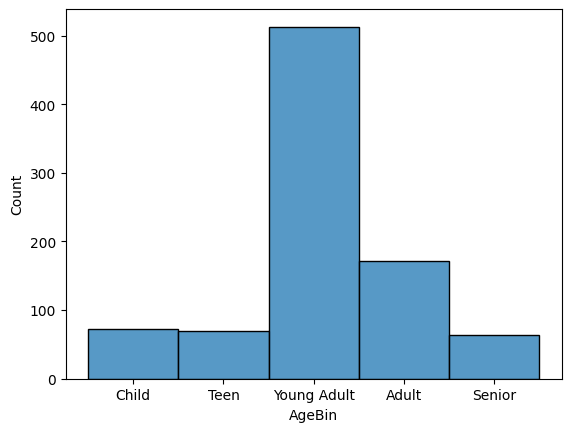

In [31]:
sns.histplot(df['AgeBin'])

In [33]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

### Feature Engineering

Passengers with family aboard often had different survival chances.

In [35]:
df['FamilySize'] = df['SibSp']+df['Parch']+1

People traveling alone might have lower survival probability.

In [37]:
df['IsAlone'] = (df['FamilySize']==1).astype(int)

Group passengers into categories based on ticket fare.

In [38]:
df['FareBin'] = pd.qcut(df['Fare'], 4, labels=['Low',  'Mid', 'High', 'Very_High'])

#### Interaction Features (Pclass × Sex)
Some survival patterns depend on both class and gender.

In [39]:
df['Pclass_Sex'] = df['Pclass'].astype(str)+"_"+df['Sex']